In [33]:
#STEP 1 — Import Libraries
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [34]:
#STEP 2 — Load Datasets
trades = pd.read_csv("C:/Users/swara/Downloads/historical_data (1).csv")
sentiment = pd.read_csv("C:/Users/swara/Downloads/fear_greed_index (1).csv")


In [35]:
#STEP 3 — Preview Data
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [36]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [37]:
#STEP 4 — Rows & Columns
trades.shape

(211224, 16)

In [38]:
sentiment.shape

(2644, 4)

In [39]:
#STEP 5 — Missing Values
trades.isnull().sum()


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [40]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [41]:
#STEP 6 — Duplicate Records
trades.duplicated().sum()

np.int64(0)

In [42]:
sentiment.duplicated().sum()

np.int64(0)

In [43]:
#STEP 7 — Convert Timestamps
trades["Timestamp"] = pd.to_datetime(trades["Timestamp"], unit="ms")
trades["date"] = trades["Timestamp"].dt.date

sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date


In [44]:
#STEP 8 — Align & Merge by Date
df = trades.merge(
    sentiment[["date","classification"]],
    on="date",
    how="left"
)
df.shape #Merged Shape


(211224, 18)

In [45]:
df.head() # First 5 Rows & Columns

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


In [46]:
#STEP 9 — Create Key Metrics
df["win"] = df["Closed PnL"] > 0


In [47]:
# Daily Metrics Per Trader
daily = df.groupby(["date","Account","classification"]).agg({
    "Closed PnL":"sum",      # Daily PnL
    "Size USD":"mean",       # Avg trade size
    "Trade ID":"count",      # Number of trades
    "win":"mean"             # Win rate
}).reset_index()

daily.rename(columns={
    "Trade ID":"trades_per_day"
}, inplace=True)

daily.head()


,date,Account,classification,Closed PnL,Size USD,trades_per_day,win
0,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Greed,0.000000,159.000000,3,0.000000
1,2023-11-14,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Greed,0.000000,23066.935000,2,0.000000
2,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,155.503357,11034.799511,1043,0.275168
3,2024-03-09,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Extreme Greed,-5564.016140,3048.594444,27,0.333333
4,2024-03-09,0x430f09841d65beb3f27765503d0f850b8bce7713,Extreme Greed,0.000000,1136.312727,88,0.000000


In [48]:
#Long / Short Ratio
long_short = df.groupby("classification")["Side"].value_counts(normalize=True)
print(long_short)


classification  Side
Extreme Greed   SELL    0.515800
                BUY     0.484200
Fear            SELL    0.506383
                BUY     0.493617
Greed           SELL    0.575050
                BUY     0.424950
Neutral         SELL    0.509172
                BUY     0.490828
Name: proportion, dtype: float64


In [49]:
#Save Processed Data
daily.to_csv("processed_data.csv", index=False)


In [50]:
# STEP 10 — Performance vs Sentiment
daily.groupby("classification")["Closed PnL"].mean()
daily.groupby("classification")["win"].mean()


classification
Extreme Greed    0.336609
Fear             0.415878
Greed            0.374074
Neutral          0.260683
Name: win, dtype: float64

In [51]:
#STEP 11 — Behavior vs Sentiment
daily.groupby("classification")["trades_per_day"].mean()
daily.groupby("classification")["Size USD"].mean()


classification
Extreme Greed    4344.447836
Fear             5926.522723
Greed            5839.310974
Neutral          3793.444161
Name: Size USD, dtype: float64

In [52]:
#STEP 12 — Charts
leverage_daily = df.groupby("Account")["Start Position"].mean().reset_index()
leverage_daily.rename(columns={"Start Position":"avg_leverage"}, inplace=True)

leverage_daily.head()

,Account,avg_leverage
0,0x083384f897ee0f19899168e3b1bec365f52a9012,-1247.334684
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,11181.808655
2,0x271b280974205ca63b716753467d5a371de622ab,-10248.195171
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,17817.982104
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,472411.528070


In [53]:
#Create Leverage Segments
leverage_daily["leverage_segment"] = pd.qcut(
    leverage_daily["avg_leverage"],
    2,
    labels=["Low Leverage","High Leverage"]
)

leverage_daily["leverage_segment"].value_counts()



leverage_segment
Low Leverage     16
High Leverage    16
Name: count, dtype: int64

In [54]:
#Merge with Daily Metrics
daily = daily.merge(leverage_daily[["Account","leverage_segment"]],
                    on="Account", how="left")

In [55]:
#Table
print(daily.groupby("leverage_segment", observed=False)["Closed PnL"].mean())


leverage_segment
Low Leverage     106862.941639
High Leverage    155565.456020
Name: Closed PnL, dtype: float64


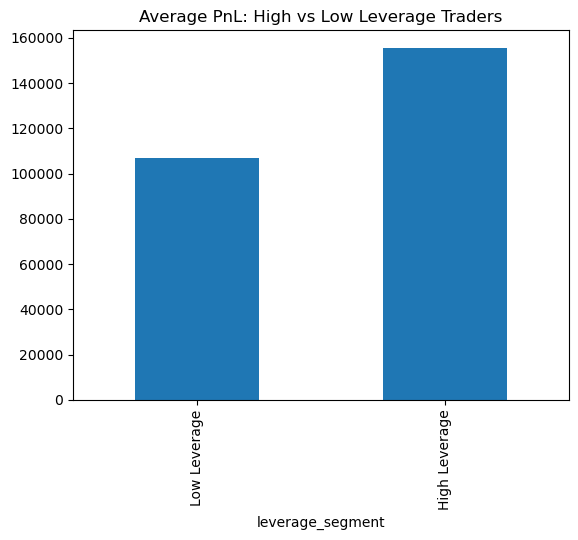

<Figure size 640x480 with 0 Axes>

In [56]:
#Chart
daily.groupby("leverage_segment", observed=False)["Closed PnL"].mean().plot(kind="bar")
plt.title("Average PnL: High vs Low Leverage Traders")
plt.savefig("leverage_segment_pnl.png")
plt.show()   
plt.clf()    


In [57]:
#Frequent vs Infrequent Traders
daily["frequency_segment"] = pd.qcut(
    daily["trades_per_day"],
    2,
    labels=["Infrequent","Frequent"]
)

daily["frequency_segment"].value_counts()


frequency_segment
Infrequent    39
Frequent      38
Name: count, dtype: int64

In [58]:
#Table
daily.groupby("frequency_segment" ,observed=False)["Closed PnL"].mean()


frequency_segment
Infrequent     28450.060306
Frequent      239886.769575
Name: Closed PnL, dtype: float64

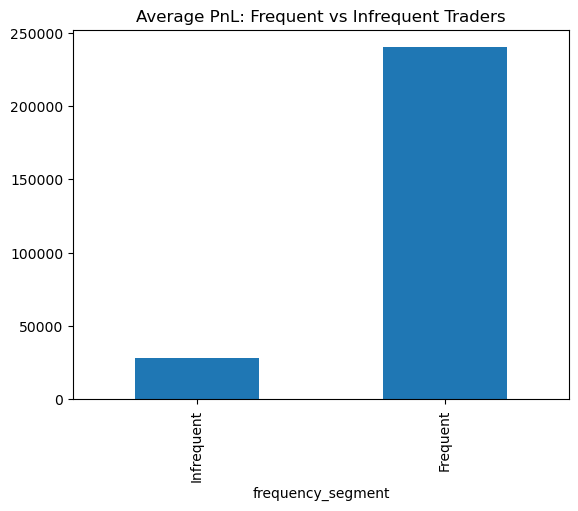

<Figure size 640x480 with 0 Axes>

In [59]:
#Chart
daily.groupby("frequency_segment",observed=False)["Closed PnL"].mean().plot(kind="bar")
plt.title("Average PnL: Frequent vs Infrequent Traders")
plt.savefig("frequency_segment_pnl.png")
plt.show()
plt.clf()


In [60]:
#Consistent Winners vs Inconsistent Traders
daily["consistency_segment"] = pd.qcut(
    daily["win"],
    2,
    labels=["Inconsistent","Consistent Winners"]
)

daily["consistency_segment"].value_counts()


consistency_segment
Inconsistent          39
Consistent Winners    38
Name: count, dtype: int64

In [61]:
#Table
print(daily.groupby("consistency_segment", observed=False)["Closed PnL"].mean())



consistency_segment
Inconsistent           24542.519324
Consistent Winners    243897.140584
Name: Closed PnL, dtype: float64


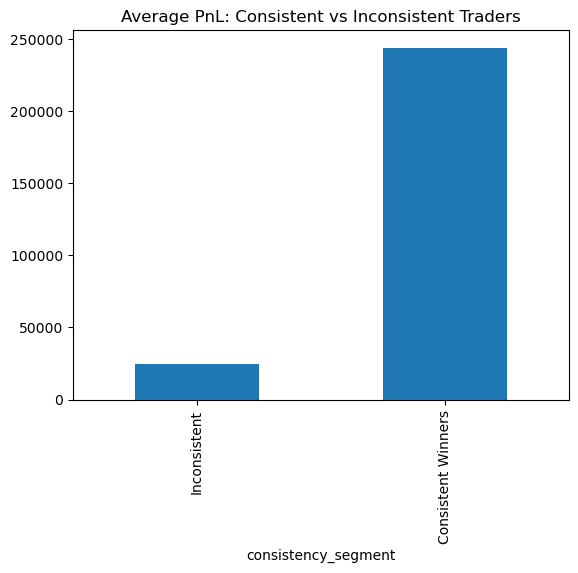

<Figure size 640x480 with 0 Axes>

In [62]:
#Chart
daily.groupby("consistency_segment",observed=False)["Closed PnL"].mean().plot(kind="bar")
plt.title("Average PnL: Consistent vs Inconsistent Traders")
plt.savefig("consistency_pnl.png")
plt.show()
plt.clf()


In [63]:
#STEP 13 — Trader Segments
daily["segment"] = pd.qcut(
    daily["trades_per_day"],
    3,
    labels=["Low Frequency","Medium Frequency","High Frequency"]
)

daily["segment"].value_counts()


segment
Low Frequency       26
High Frequency      26
Medium Frequency    25
Name: count, dtype: int64

In [64]:
#-------------

#PART C — ACTIONABLE OUTPUT

Strategy 1  Risk Control During Fear Days
Rule:
During Fear days, high-leverage traders should reduce leverage and position size.
Evidence from Analysis:
     .Average PnL is lower on Fear days than Greed days.
     .High-leverage segment shows more negative and volatile PnL compared to low-leverage traders.
Actionable Implementation:
     .Cap leverage for high-leverage traders.
     .Encourage smaller trade sizes.
     .Focus on fewer, higher-quality trades.
Expected Benefit:
     .Reduces drawdowns and protects capital during high-uncertainty market conditions.""

# Strategy 2  Selective Aggression During Greed Days
Rule:
During Greed days, allow frequent and consistent traders to slightly increase trade frequency and position size.

Evidence from Analysis:
     . Greed days show higher average PnL and win rate.
     .Consistent winners outperform inconsistent traders across all sentiments.
Actionable Implementation:
     .Increase position limits only for traders with high win rate.
     .Allow moderate increase in trade frequency.
Expected Benefit:
Captures upside momentum while avoiding excessive risk from poor-performing traders.
#----------------


SyntaxError: invalid syntax (2688362960.py, line 5)

In [67]:
#BONUS PART
#STEP 14 — Predictive Model
daily["profitable"] = daily["Closed PnL"] > 0

X = daily[["Size USD","trades_per_day","win"]]
y = daily["profitable"]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

model = RandomForestClassifier()
model.fit(X_train,y_train)

print("Model Accuracy:",model.score(X_test,y_test))


Model Accuracy: 0.75


In [68]:
#STEP 15 — Clustering Traders
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily["cluster"] = kmeans.fit_predict(scaled)

print(daily["cluster"].value_counts())


cluster
0    66
1     9
2     2
Name: count, dtype: int64
